In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/MyDrive/Projects/ODE_Calculator'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Projects/ODE_Calculator


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

import matplotlib.pyplot as plt

import utils
from ODE_Calculator_ver3 import ODE_Calculator

device = "cuda:0" if torch.cuda.is_available() else "cpu"
print(device)

cuda:0


In [ ]:
%reload_ext autoreload
%autoreload 2
from ODE_Calculator_ver3 import ODE_Calculator

In [ ]:
ode_point_sampler = utils.ODE_Point_sampler(0,2,4000)

In [ ]:
model = ODE_Calculator(ode_point_sampler, device)

Order of your ODE? : 2
Format rules
1. No space
2. t is variable of y
3. Convert ^ -> ** except for e^(t)
4. Always contain '()' small brackets when using functions. Ex) sint -> sin(t), e^(t)
Input example : y''-2*y**2=sin(2*t)+e^(-2*t)
Input your ODE : y''-2*t*y'+8*y=0
Initial condition 1, y(0) = 3
Initial condition 2, y`(0) = 0
Pytorch expression of your ODE : ddy-2*batch*dy+8*y=0


In [ ]:
model.train(epoch = 6000, bs = 1024, lr = 1E-3, optimizer_type = "Adam", display_step = 20)

EPOCH [300/6000]
LOSS = 14.96713924407959, lr = 0.001
EPOCH [600/6000]
LOSS = 7.013906955718994, lr = 0.001
EPOCH [900/6000]
LOSS = 4.891818642616272, lr = 0.001
EPOCH [1200/6000]
LOSS = 3.146881878376007, lr = 0.001
EPOCH [1500/6000]
LOSS = 4.928930044174194, lr = 0.001
EPOCH [1800/6000]
LOSS = 1.825757622718811, lr = 0.001
EPOCH [2100/6000]
LOSS = 1.262216717004776, lr = 0.001
EPOCH [2400/6000]
LOSS = 1.718748390674591, lr = 0.001
EPOCH [2700/6000]
LOSS = 0.8117114454507828, lr = 0.001
EPOCH [3000/6000]
LOSS = 6.239254251122475, lr = 0.0001
EPOCH [3300/6000]
LOSS = 0.3931688964366913, lr = 0.0001
EPOCH [3600/6000]
LOSS = 0.316758394241333, lr = 0.0001
EPOCH [3900/6000]
LOSS = 0.24196410924196243, lr = 0.0001
EPOCH [4200/6000]
LOSS = 0.22947639971971512, lr = 0.0001
EPOCH [4500/6000]
LOSS = 0.17391994036734104, lr = 0.0001
EPOCH [4800/6000]
LOSS = 0.09950660541653633, lr = 0.0001
EPOCH [5100/6000]
LOSS = 0.10538381710648537, lr = 0.0001
EPOCH [5400/6000]
LOSS = 0.054962290450930595, l

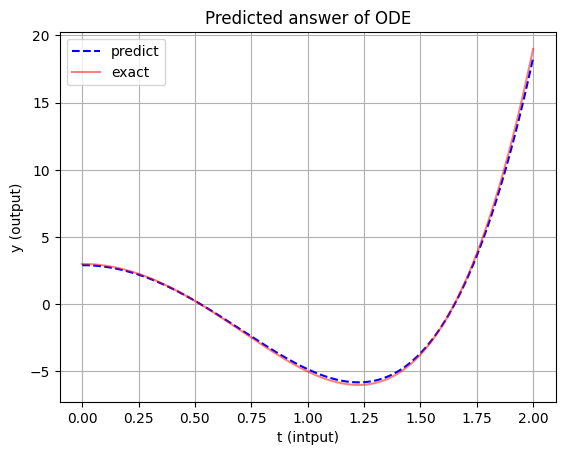

In [ ]:
x = torch.linspace(0,2,4000)
y = 3-12*x**2+4*x**4
model.gen_graph(exact = y)

In [ ]:
x = torch.tensor([0.5891])
y = 3-12*x**2+4*x**4
print(y)

tensor([2.2185])

In [ ]:
model.gen_value(observe_t =0.5891)

Expected value at t = 0.5891 : 2.2317721843719482
